<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Proyecto4x4YPF_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 4x4 YPF - Primer pilar Vaca Muerta

El proyecto de modelado busca seguir la linea de pensamiento de desarrollo de la compañía YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los próximos 4 años. En primordial que este objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforación y adoptar un enfoque más eficiente en la gestión financiera. La compañía ha logrado reducir los tiempos de perforación de aproximadamente un año a 170 días, mediante mejoras técnicas y operativas.

Este plan de transformación busca posicionar a YPF como una empresa más eficiente, rentable y alineada con las tendencias internacionales del sector energético, con una visión clara en el desarrollo del shale en Argentina.


## **Modelado**

En la pre entrega 2, realizamos la transformación de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en función al análisis exploratorio que features tener en consideración para el modelado.

Como observamos anteriormente tanto la producción de petróleo como la producción de gas son dos datos que queremos predecir para los próximos 4 años, sin embargo el análisis estará centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales áreas de permiso de concesión tanto para la producción de petróleo como para la producción de gas.

Así como también tenemos que mencionar que el dataset está centrado únicamente en la producción de lo no convencional, es decir, de aquella extracción que requiere tecnologías más avanzadas, costosas o intensivas en recursos debido a las características del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producción de petróleo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian según el tipo de roca y suelen requerir técnicas como la fractura hidráulica (fracking) para su extracción. Mientras que el shale se extrae de la roca sedimentaria rica en materia orgánica que actúa como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.


In [4]:
#descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df (1).csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1219,66440,2023,1
1,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1217,77504,2023,2
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1250,95092,2023,3
3,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1096,97896,2023,4
4,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1402,100525,2023,5


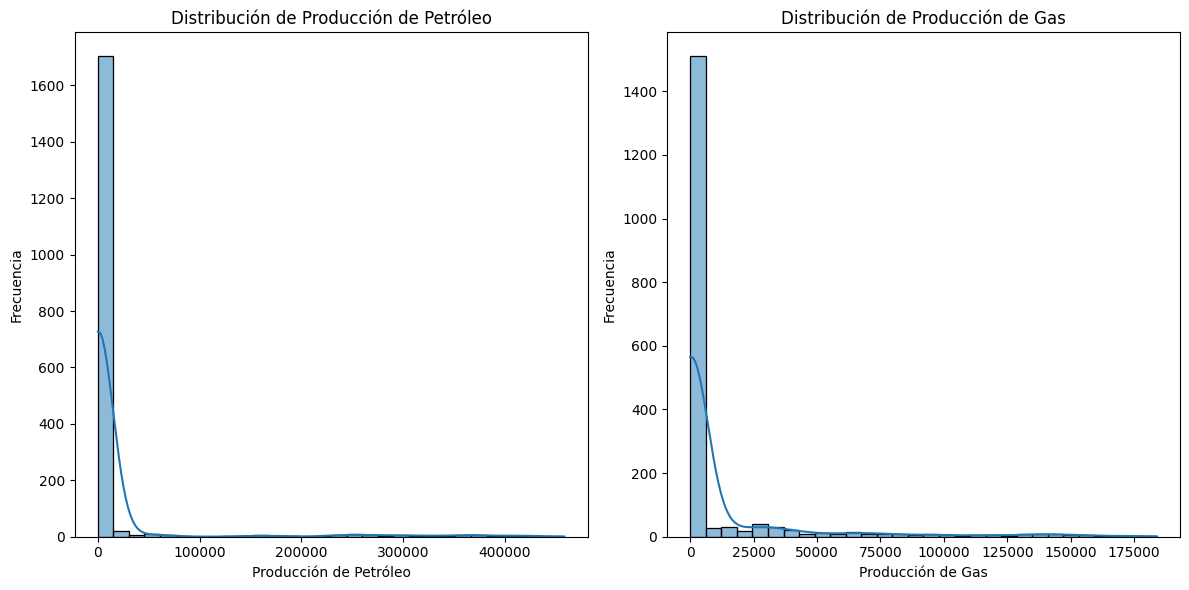

In [6]:
# prompt: generame un histograma para la columna Producción de Petroleo y Producción de gas

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Produccion_ypf['Produccion de Petroleo'], kde=True, bins=30)
plt.title('Distribución de Producción de Petróleo')
plt.xlabel('Producción de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(Produccion_ypf['Produccion de Gas'], kde=True, bins=30)
plt.title('Distribución de Producción de Gas')
plt.xlabel('Producción de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [7]:
# prompt: Calcular rango intercuatilico para produccion de petroleo y gas

# Calcular el Rango Intercuartílico (IQR) para la Producción de Petróleo y Gas
Q1_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.25)
Q3_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.75)
IQR_petroleo = Q3_petroleo - Q1_petroleo

Q1_gas = Produccion_ypf['Produccion de Gas'].quantile(0.25)
Q3_gas = Produccion_ypf['Produccion de Gas'].quantile(0.75)
IQR_gas = Q3_gas - Q1_gas

print(f"Rango Intercuartílico para Producción de Petróleo: {IQR_petroleo}")
print(f"Rango Intercuartílico para Producción de Gas: {IQR_gas}")

Rango Intercuartílico para Producción de Petróleo: 251.0
Rango Intercuartílico para Producción de Gas: 1361.25


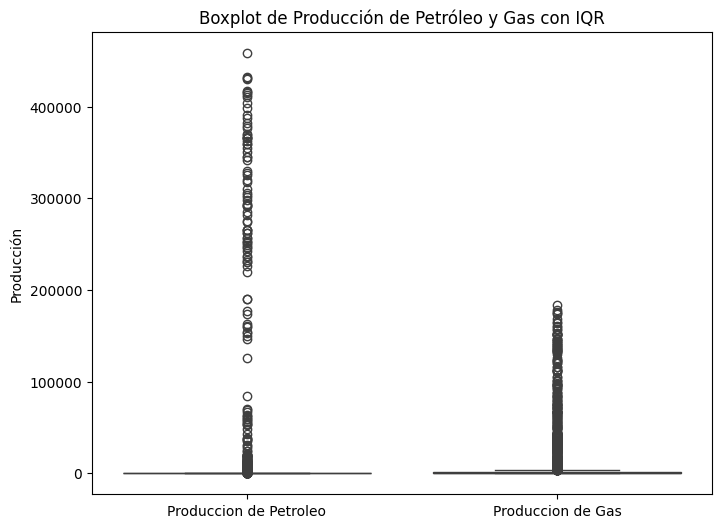

In [8]:
# prompt: graficame los rangos intercuartilicos anteriores

import matplotlib.pyplot as plt
# Crear un boxplot para visualizar los rangos intercuartílicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']])
plt.title('Boxplot de Producción de Petróleo y Gas con IQR')
plt.ylabel('Producción')
plt.show()

In [9]:
# prompt: calculame el valor maximo y minimo de produccion de petroleo y gas

max_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].max()
min_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].min()

max_produccion_gas = Produccion_ypf['Produccion de Gas'].max()
min_produccion_gas = Produccion_ypf['Produccion de Gas'].min()

print(f"Valor máximo de producción de petróleo: {max_produccion_petroleo}")
print(f"Valor mínimo de producción de petróleo: {min_produccion_petroleo}")
print(f"Valor máximo de producción de gas: {max_produccion_gas}")
print(f"Valor mínimo de producción de gas: {min_produccion_gas}")

Valor máximo de producción de petróleo: 458378.0
Valor mínimo de producción de petróleo: 0.0
Valor máximo de producción de gas: 183923.0
Valor mínimo de producción de gas: 0.0


In [10]:
# prompt: calculame la media para produccion de petroleo y produccion de gas mensual

media_mensual = Produccion_ypf.groupby(['Año', 'Mes'])[
    ['Produccion de Petroleo', 'Produccion de Gas']
].mean().reset_index()

In [11]:
media_mensual = media_mensual.sort_values(['Año', 'Mes'])

In [12]:
print ("Media mensual de producción de petróleo y gas:")
media_mensual

Media mensual de producción de petróleo y gas:


,Año,Mes,Produccion de Petroleo,Produccion de Gas
0,2023.0,1.0,12732.415385,10926.061538
1,2023.0,2.0,11448.803030,9930.696970
2,2023.0,3.0,13049.515152,10937.303030
3,2023.0,4.0,12689.424242,10427.969697
4,2023.0,5.0,13421.384615,10528.892308
5,2023.0,6.0,12896.215385,11061.938462
6,2023.0,7.0,12894.439394,11596.787879
7,2023.0,8.0,12765.313433,11266.343284
8,2023.0,9.0,13112.015152,10550.848485
9,2023.0,10.0,14626.776119,9956.343284


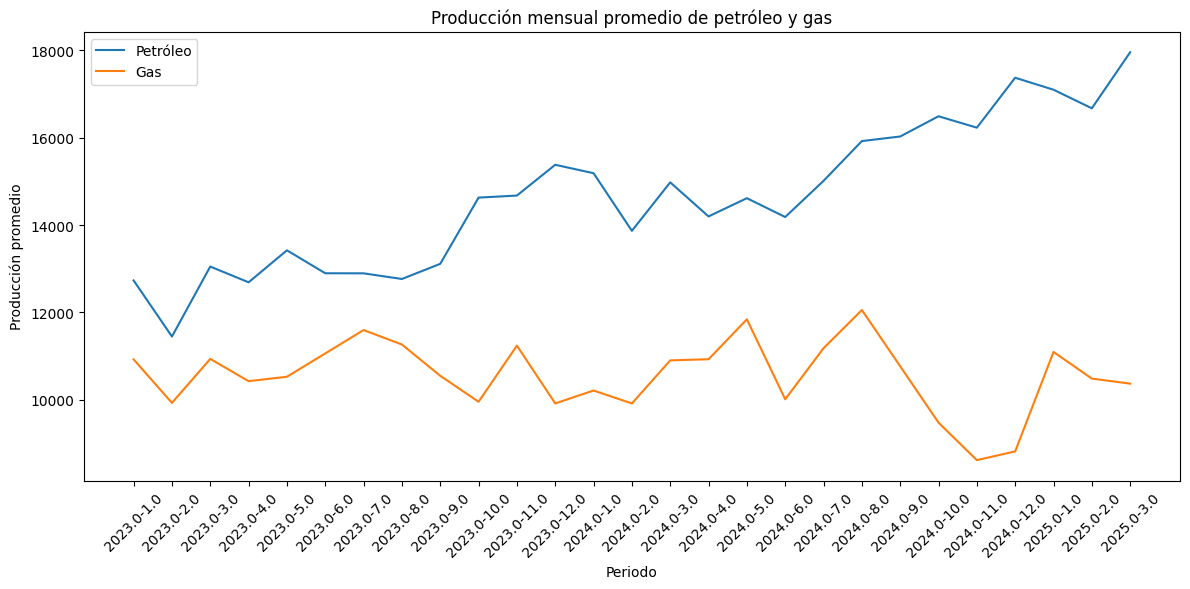

In [13]:
# Crear una columna "label" tipo 'YYYY-MM' para el eje X
media_mensual['Periodo'] = media_mensual['Año'].astype(str) + '-' + media_mensual['Mes'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
plt.plot(media_mensual['Periodo'], media_mensual['Produccion de Petroleo'], label='Petróleo')
plt.plot(media_mensual['Periodo'], media_mensual['Produccion de Gas'], label='Gas')
plt.xticks(rotation=45)
plt.xlabel('Periodo')
plt.ylabel('Producción promedio')
plt.title('Producción mensual promedio de petróleo y gas')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
mediana_mensual = Produccion_ypf.groupby(['Año', 'Mes'])[
    ['Produccion de Petroleo', 'Produccion de Gas']
].median().reset_index()

In [15]:
mediana_mensual = mediana_mensual.sort_values(['Año', 'Mes'])

In [16]:
print ("Mediana mensual de producción de petróleo y gas:")
mediana_mensual

Mediana mensual de producción de petróleo y gas:


,Año,Mes,Produccion de Petroleo,Produccion de Gas
0,2023.0,1.0,0.0,0.0
1,2023.0,2.0,0.0,0.0
2,2023.0,3.0,0.0,0.0
3,2023.0,4.0,0.0,0.0
4,2023.0,5.0,0.0,0.0
5,2023.0,6.0,0.0,0.0
6,2023.0,7.0,0.0,0.0
7,2023.0,8.0,0.0,0.0
8,2023.0,9.0,0.0,0.0
9,2023.0,10.0,0.0,0.0


Rango Intercuartílico para Producción de Petróleo (después de limpiar ceros): 251.0
Rango Intercuartílico para Producción de Gas (después de limpiar ceros): 1361.25


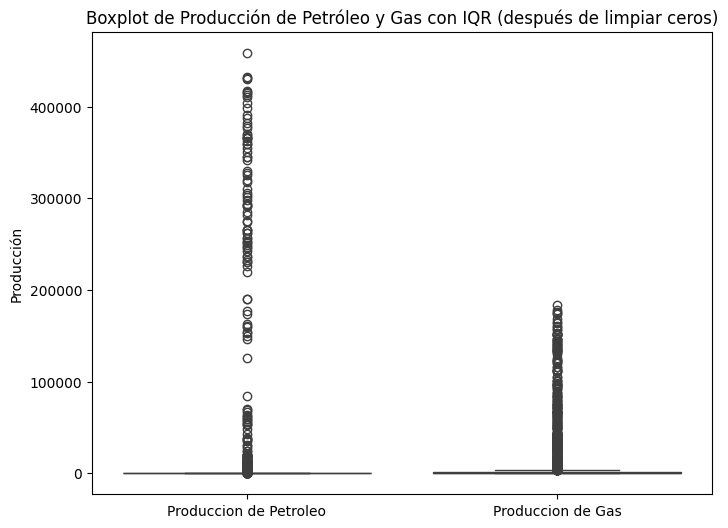

In [17]:
# prompt: calcular rango intercuartilico de produccion de petroleo y produccion de gas

import matplotlib.pyplot as plt
# Recalcular el Rango Intercuartílico (IQR) para la Producción de Petróleo y Gas después de reemplazar los ceros
Q1_petroleo_cleaned = Produccion_ypf['Produccion de Petroleo'].quantile(0.25)
Q3_petroleo_cleaned = Produccion_ypf['Produccion de Petroleo'].quantile(0.75)
IQR_petroleo_cleaned = Q3_petroleo_cleaned - Q1_petroleo_cleaned

Q1_gas_cleaned = Produccion_ypf['Produccion de Gas'].quantile(0.25)
Q3_gas_cleaned = Produccion_ypf['Produccion de Gas'].quantile(0.75)
IQR_gas_cleaned = Q3_gas_cleaned - Q1_gas_cleaned

print(f"Rango Intercuartílico para Producción de Petróleo (después de limpiar ceros): {IQR_petroleo_cleaned}")
print(f"Rango Intercuartílico para Producción de Gas (después de limpiar ceros): {IQR_gas_cleaned}")

# Crear un boxplot para visualizar los rangos intercuartílicos después de reemplazar los ceros
plt.figure(figsize=(8, 6))
sns.boxplot(data=Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']])
plt.title('Boxplot de Producción de Petróleo y Gas con IQR (después de limpiar ceros)')
plt.ylabel('Producción')
plt.show()

In [18]:
# Función para crear un filtro basado en el IQR
def filtrar_por_iqr(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    return columna.between(Q1, Q3)

# Aplicar filtro IQR a las columnas de interés
filtro_petroleo = filtrar_por_iqr(Produccion_ypf['Produccion de Petroleo'])
filtro_gas = filtrar_por_iqr(Produccion_ypf['Produccion de Gas'])

# Conservar solo las filas donde ambas columnas estén dentro del IQR
Produccion_ypf_filtrado = Produccion_ypf[filtro_petroleo & filtro_gas]

In [23]:
Produccion_ypf_filtrado.head(20)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
27,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0,2023.0,2.0
36,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,443.0,2023.0,11.0
37,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,12.0
38,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,2024.0,1.0
39,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,889.0,2024.0,2.0
48,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.0,2024.0,11.0
53,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,1.0
54,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,2.0
55,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,3.0
56,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,4.0


In [19]:
#Con la función columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Inyección de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrolífero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHAÑAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de conc

In [20]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1219.0,66440.0,2023.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1217.0,77504.0,2023.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,95092.0,2023.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1096.0,97896.0,2023.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1402.0,100525.0,2023.0,5.0


In [21]:
Produccion_ypf.astype(int) #aplicamos astype para visualizar los datos en números enteros

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1219,66440,2023,1
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1217,77504,2023,2
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1250,95092,2023,3
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1096,97896,2023,4
4,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1402,100525,2023,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2024,11
1822,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2024,12
1823,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2025,1
1824,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2025,2


In [22]:
Produccion_ypf.columns.tolist() #Nuevamente aplicamos la función columns para visualizar como quedó el dataset con las columnas eliminadas, ahora son 29 columnas

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Petrolífero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGRUL

### **Regresión Lineal**

In [23]:
Produccion_ypf_copia2 = Produccion_ypf.copy() #es la copia del dataframe nuevo que si contiene Produccion de petróleo y Producción de gas

In [24]:
x = Produccion_ypf_filtrado.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [25]:
x.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Año,Mes
27,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,2.0
36,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,11.0
37,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,12.0
38,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024.0,1.0
39,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024.0,2.0


In [26]:
lista_atributos = x.columns

In [27]:
y = Produccion_ypf_filtrado[['Produccion de Petroleo','Produccion de Gas']]

In [28]:
x, y =np.array(x), np.array(y)

In [29]:
x

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.023e+03,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.023e+03,
        1.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.023e+03,
        1.200e+01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        2.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        3.000e+00]])

In [30]:
y[:10]

array([[  0., 449.],
       [  0., 443.],
       [  0.,   0.],
       [  0., 356.],
       [  0., 889.],
       [  0., 198.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.]])

### **Separando Train-Test**

In [31]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [33]:
x.shape

(1240, 43)

In [34]:
X_train.shape

(992, 43)

In [35]:
y_test.shape

(248, 2)

In [36]:
X_test.shape

(248, 43)

In [37]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

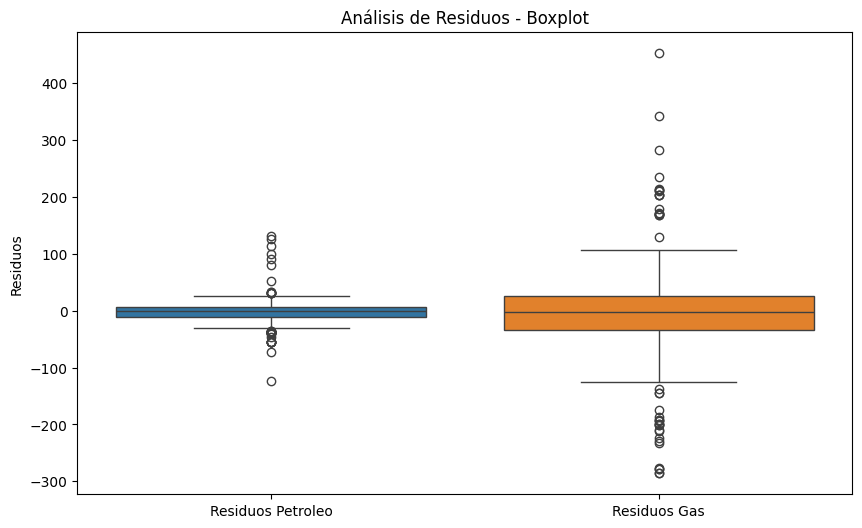

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_df = pd.DataFrame(residuals, columns=['Residuos Petroleo', 'Residuos Gas'])

# Crear boxplots para los residuos
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df)
plt.title('Análisis de Residuos - Boxplot')
plt.ylabel('Residuos')
plt.show()


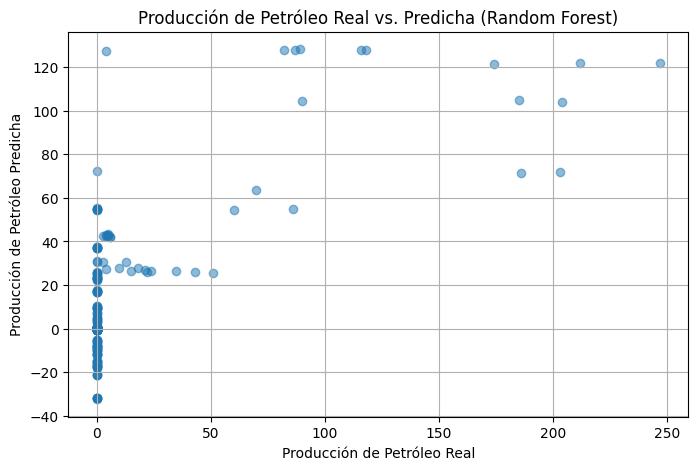

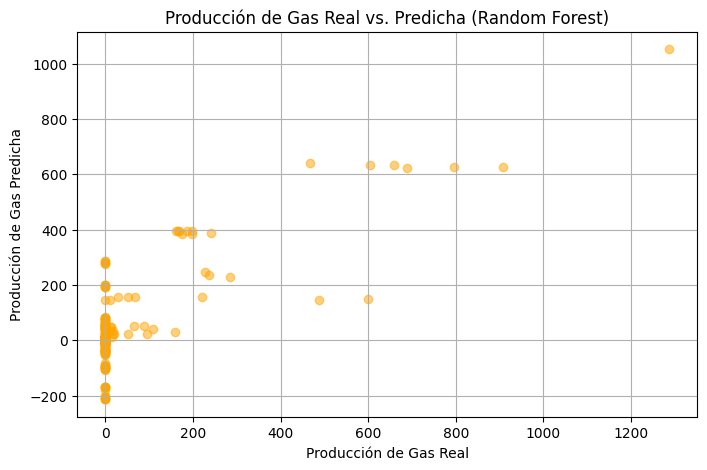

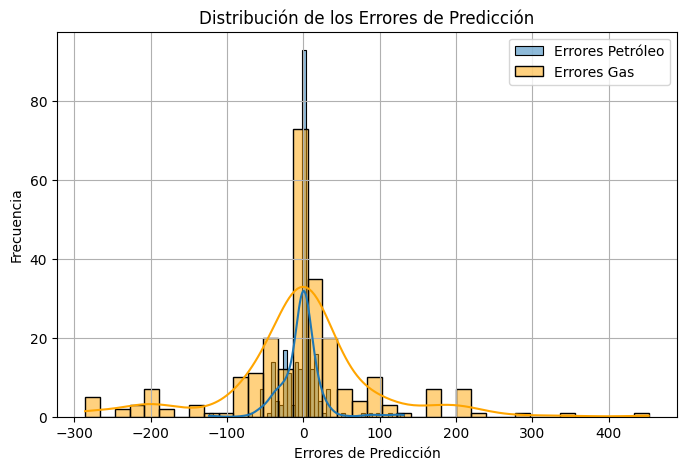

In [39]:
import matplotlib.pyplot as plt
# Asumiendo que ya tienes un modelo de regresión entrenado (ej: RandomForestRegressor)
# Aquí se muestra un ejemplo genérico de cómo podrías generar y visualizar las predicciones.
# Necesitarás tener un modelo entrenado llamado 'model'.

# Si no tienes un modelo entrenado, descomenta las siguientes líneas y adapta el código:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.legend()
plt.grid(True)
plt.show()


### **Random Forest**

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [43]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [44]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [45]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred

array([[3.38500e+01, 3.82500e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [3.21750e+01, 4.22500e+00],
       [2.15000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [1.50000e-01, 7.75000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [2.15000e+00, 0.00000e+00],
       [1.35000e+00, 1.00000e-01],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [2.15000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00,

In [46]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

14.611189516129036

In [47]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: nan%


<ipython-input-47-e89657d792ca>:1: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-47-e89657d792ca>:1: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


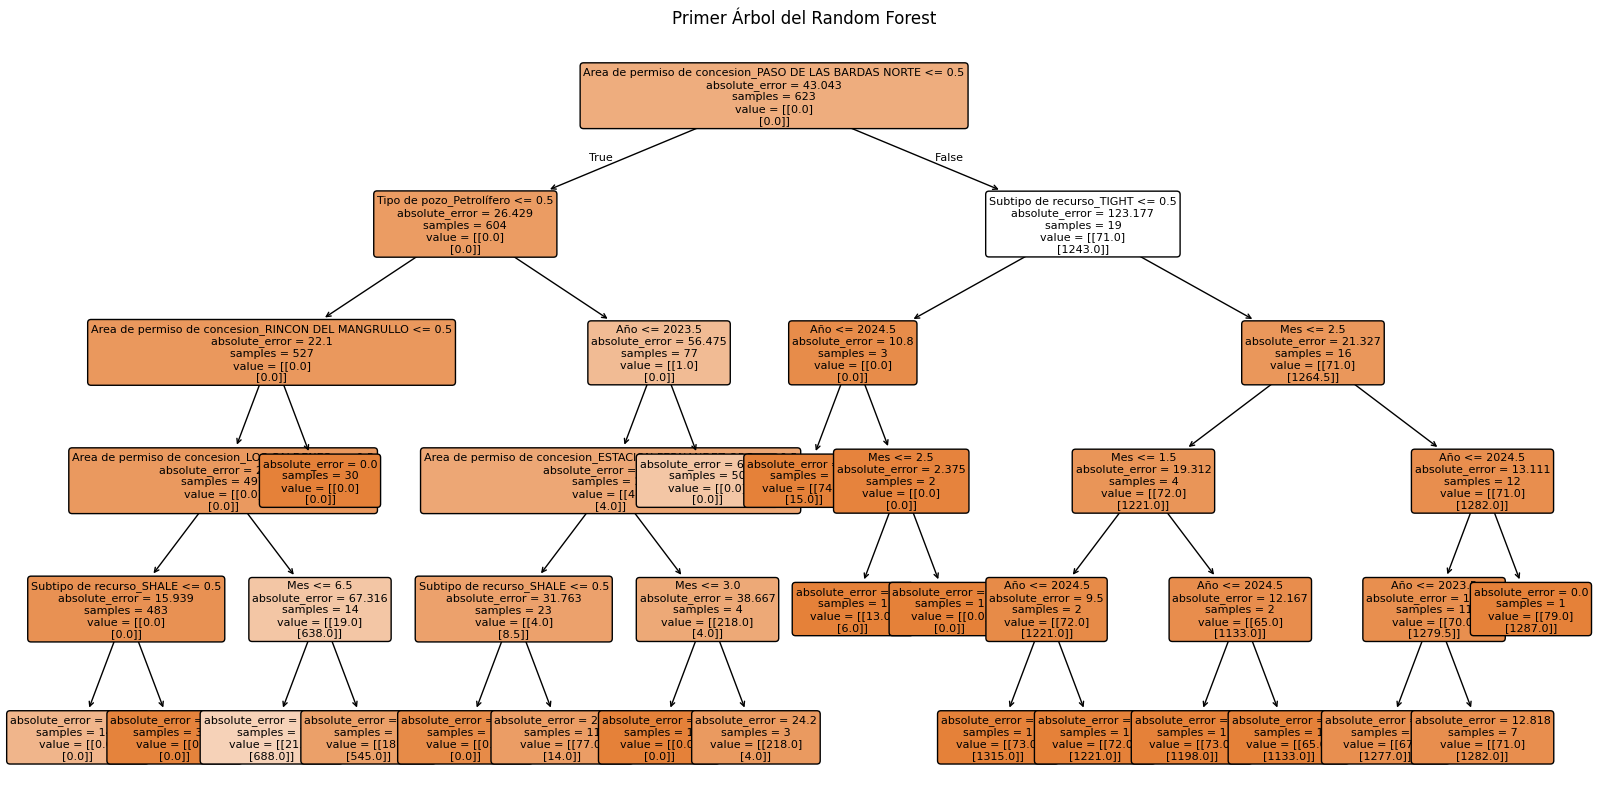

In [48]:
# prompt: me podes generar un gráfico de arbol

import matplotlib.pyplot as plt
!pip install scikit-learn matplotlib

from sklearn.tree import plot_tree

# Asumo que ya tienes un modelo de RandomForestRegressor entrenado llamado 'regresor'
# y que 'lista_atributos' contiene los nombres de las características.

# Asegúrate de que el modelo es un RandomForestRegressor
if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer árbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),  # Asegúrate de que sea una lista
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer Árbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")


### **Support Vector Machine**

In [49]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [50]:
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [51]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [52]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[0.10002661, 0.10001824],
       [0.0999946 , 0.09999124],
       [0.0999946 , 0.09999374],
       [0.0999946 , 0.09999074],
       [0.0999941 , 0.09999324],
       [0.10002661, 0.10002074],
       [0.0999996 , 0.10000174],
       [0.0999946 , 0.09999424],
       [0.0999941 , 0.09999574],
       [0.0999946 , 0.09999424],
       [0.0999916 , 0.09998723],
       [0.0999931 , 0.09999024],
       [0.0999896 , 0.10000124],
       [0.0999916 , 0.09998973],
       [0.10000161, 0.10000424],
       [0.0999931 , 0.09999174],
       [0.0999921 , 0.10001674],
       [0.0999936 , 0.09999474],
       [0.0999896 , 0.10000224],
       [0.0999926 , 0.09999074],
       [0.0999996 , 0.10000374],
       [0.0999896 , 0.09999674],
       [0.0999941 , 0.09999174],
       [0.0999971 , 0.10000174],
       [0.10000161, 0.10000274],
       [0.0999946 , 0.09999474],
       [0.0999996 , 0.10000324],
       [0.0999916 , 0.10000574],
       [0.0999846 , 0.09997673],
       [0.0999996 , 0.10000224],
       [0.

In [53]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

24.887896563279824

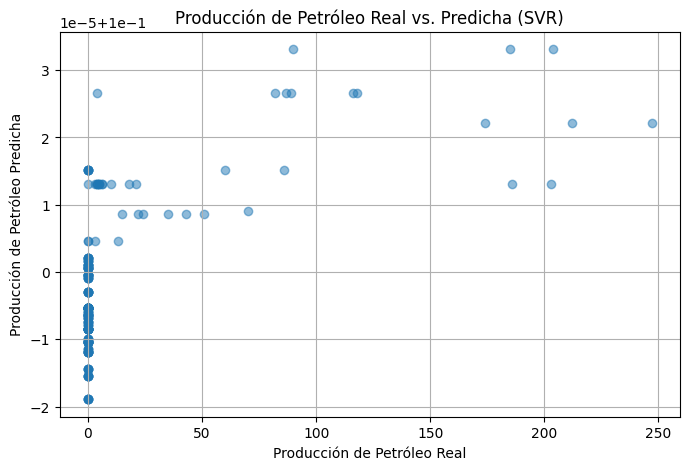

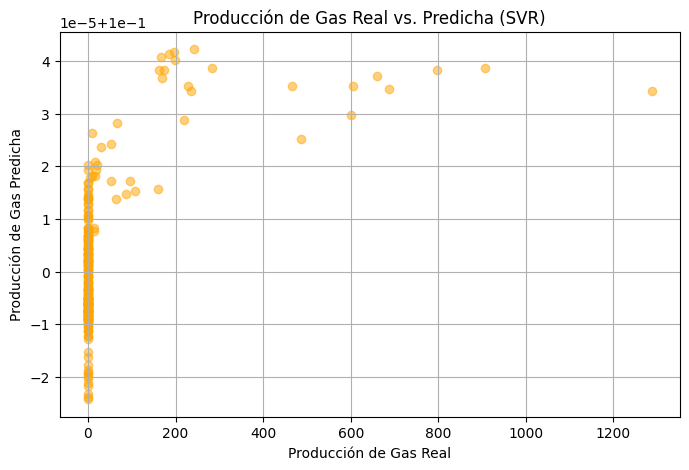

In [ ]:
# prompt: gráfico support vector machine para este caso

import matplotlib.pyplot as plt
# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción (SVR)')
plt.legend()
plt.grid(True)
plt.show()


### **XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [2]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

NameError: name 'XGBRegressor' is not defined

In [1]:
modelo_xgb.fit(X_train, y_train)

NameError: name 'modelo_xgb' is not defined

In [ ]:
y_pred_xgb = modelo_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 64.61491399678978
RMSE: 106.36574065920581
R²: 0.6144801714879747


### **Optimización: Gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1}


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 54.526800346981
RMSE: 106.17909361789482
R²: 0.6160694135794957


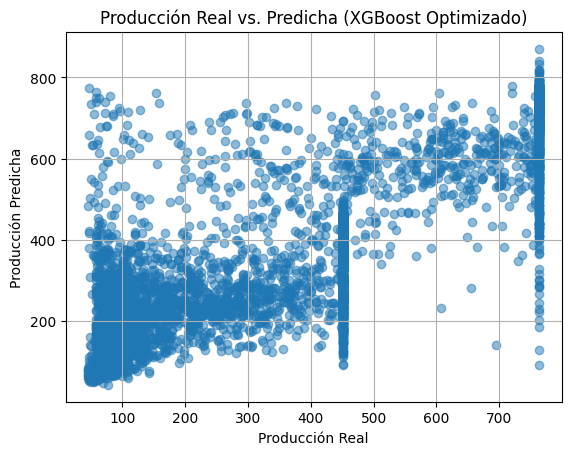

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producción Real")
plt.ylabel("Producción Predicha")
plt.title("Producción Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()